In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the file
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
# Value counts for categorical data

print(data.sex.value_counts(), '\n', data.children.value_counts(), '\n', data.smoker.value_counts(), '\n', data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### Replacing the categorical variable with numerical variables

In [6]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Exploratory Data Analysis

### Univariate Analysis

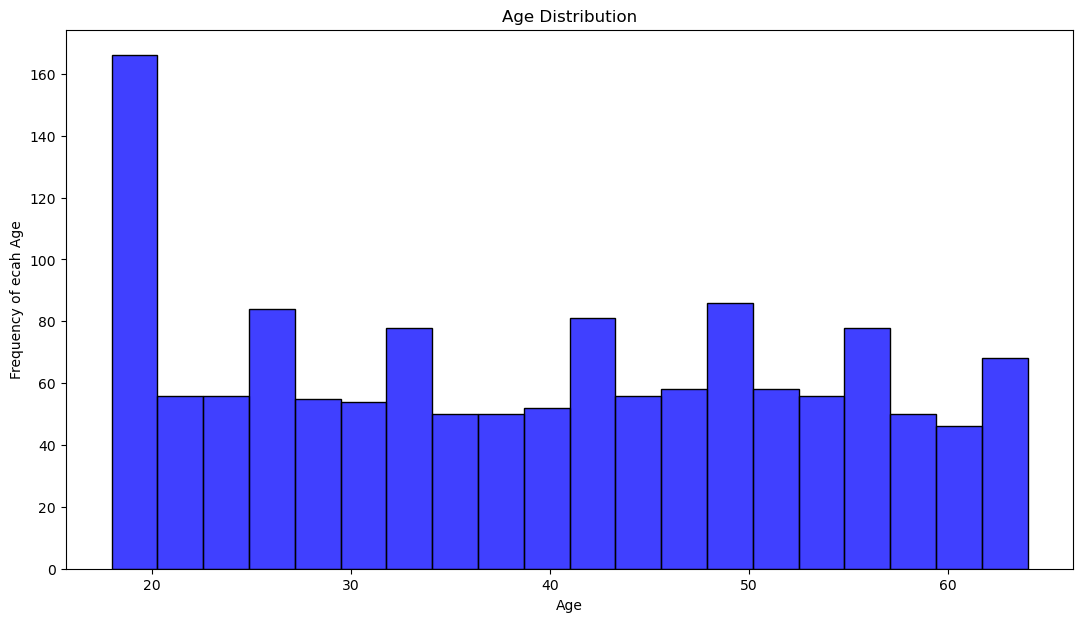

In [8]:
# Checking Age Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data.age, bins = 20, kde = False, color = 'blue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of ecah Age')
plt.show()

*Maximum people in a dataset have a age below 20.*

Text(0.5, 1.0, 'Gender Distribution')

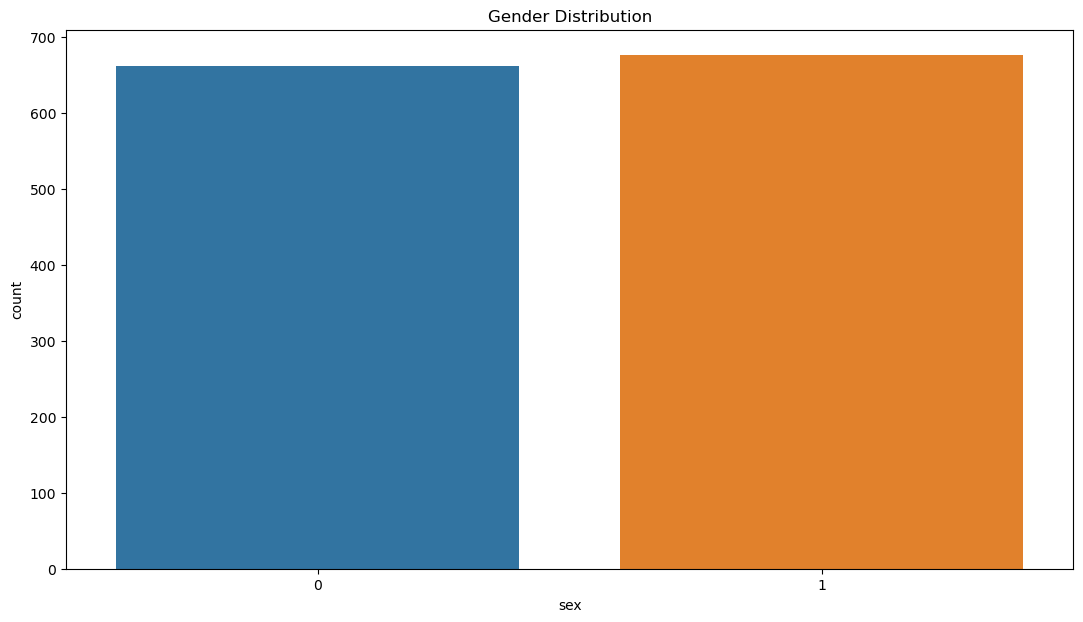

In [9]:
# Checking Sex Distribution

plt.figure(figsize=(13, 7))
sns.countplot(x = 'sex', data = data)
plt.title("Gender Distribution")

In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


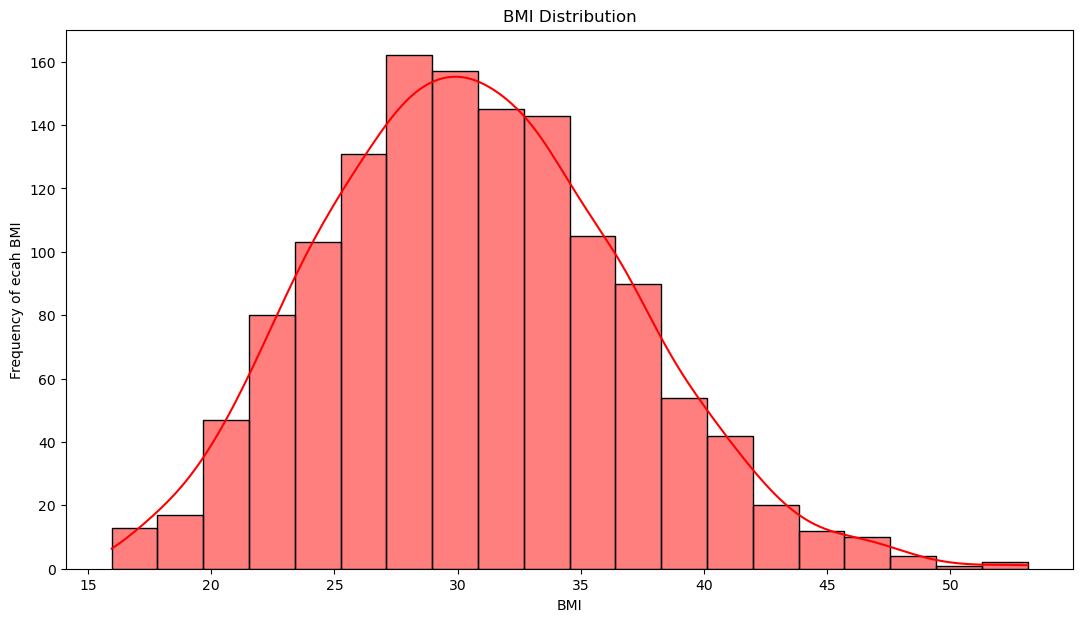

In [11]:
# Checking BMI Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data.bmi, bins = 20, kde = True, color = 'red')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency of ecah BMI')
plt.show()

*The majority of the people have BMI in between 25 and 40, which is considered as overweight and could be a major factor in increasing the medical cost.*

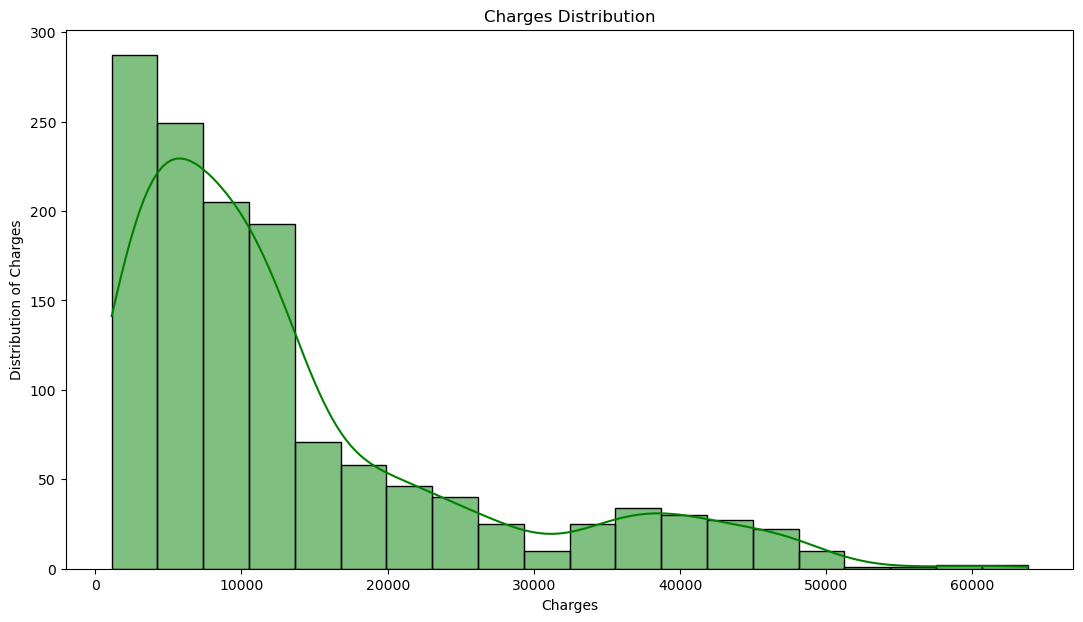

In [12]:
# Checking Charges Distribution

plt.figure(figsize=(13, 7))
sns.histplot(data.charges, bins = 20, kde = True, color = 'green')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Distribution of Charges')
plt.show()

*Most of the medical expenses are below 20000, with negligible number of patients having a medical expense above 50000.*

### Bi-variate Analysis

<Figure size 1300x700 with 0 Axes>

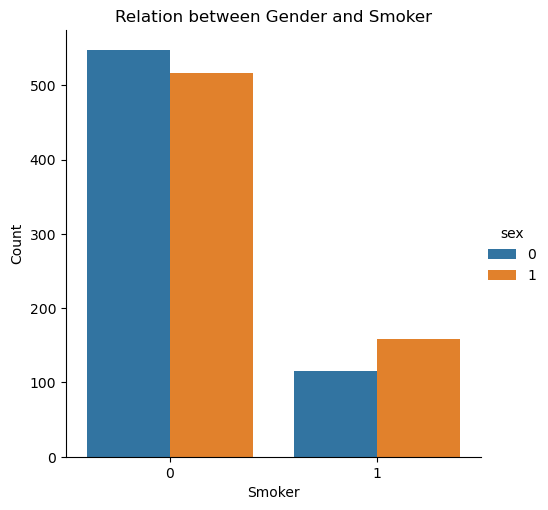

In [13]:
# Relation between Gender and Smoker

plt.figure(figsize=(13, 7))
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', data = data)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Relation between Gender and Smoker')
plt.show()

*We can observe that male smokers are more in numbers, so, I will assume that medical treatment expense for male would be more than female.*

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

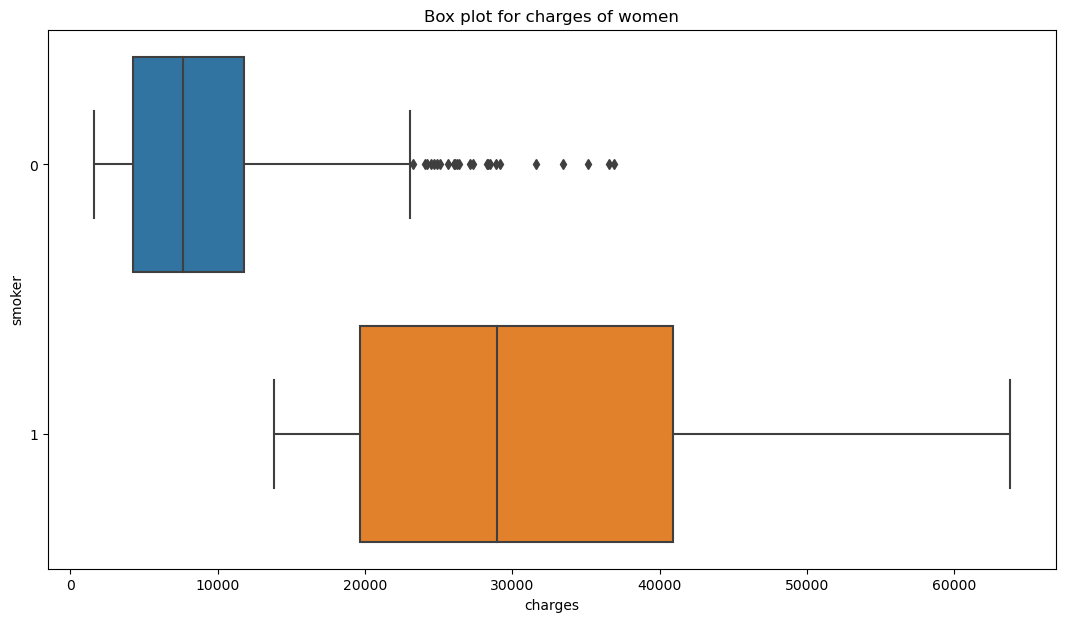

In [14]:
plt.figure(figsize=(13, 7))

plt.title('Box plot for charges of women')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 0)], orient = 'h')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

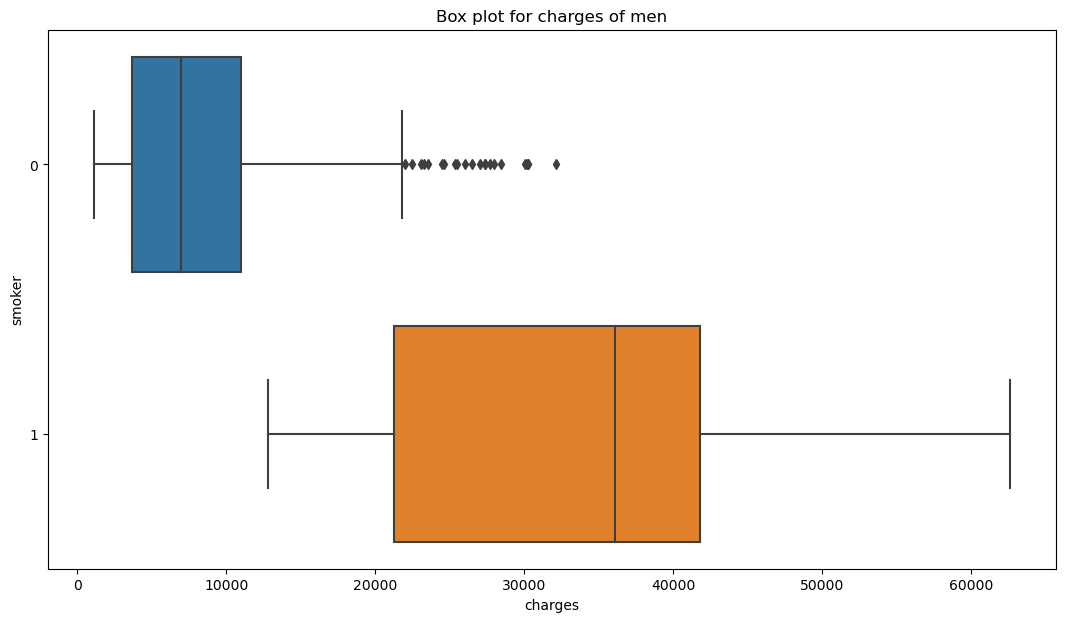

In [15]:
plt.figure(figsize=(13, 7))

plt.title('Box plot for charges of men')
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 1)], orient = 'h')

*The assumption is true, that the medical expense of males is greater than that of females. In addition to that medical expenses of smokers is greater than that of non-smokers.*

In [16]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

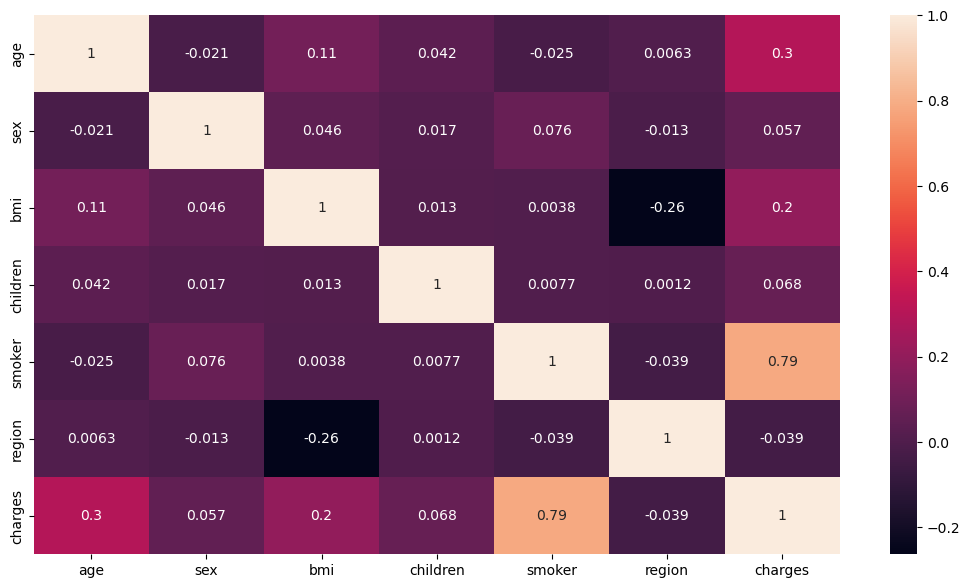

In [17]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor,annot=True)

***By observing above plot we can state that smokers has more medical expenses so it has a high impact on insurance charge followed by  age and bmi whereas region, gender and children has no impact.***

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

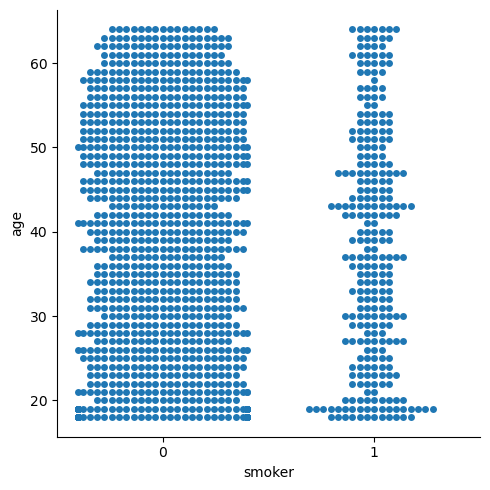

In [18]:
# relation between smokers and age distribution

plt.figure(figsize=(13, 7))
sns.catplot(x = 'smoker', y = 'age', kind = 'swarm', data = data)

*From the above graph, we can observe that there is significant number of smokers at the age 19.*

### Multi-variate Analysis

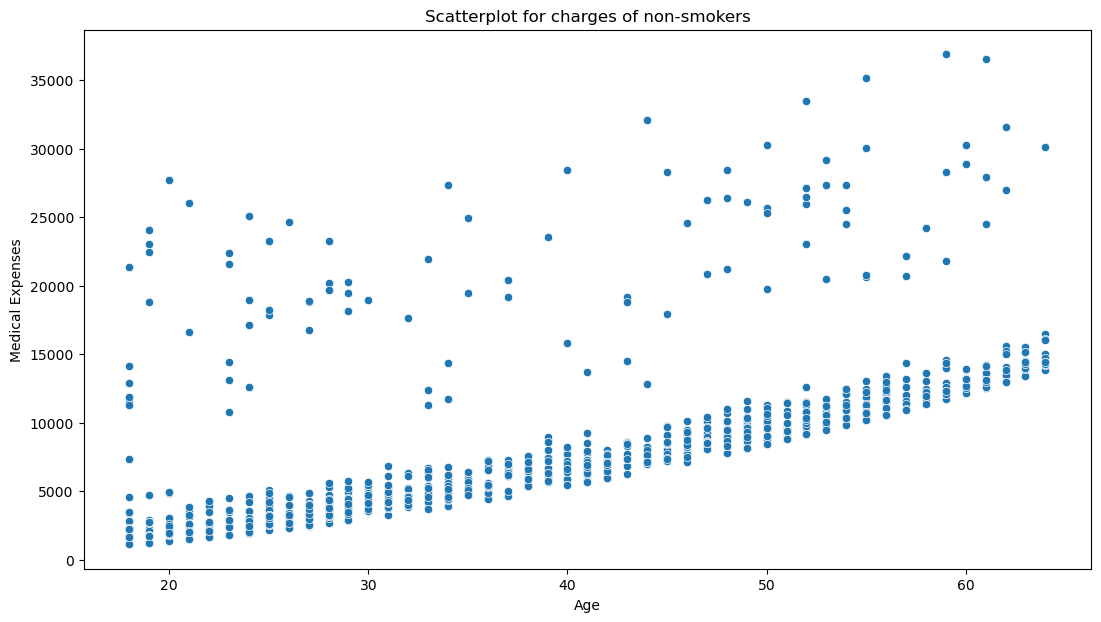

In [19]:
plt.figure(figsize=(13, 7))

sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 0)])
plt.title("Scatterplot for charges of non-smokers")
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

*Majority of the points shows that medical expenses increases with the age which may due to the fact that older people are more prone to illness. But there are some outliers which shows other illness or expenses which may lead to increase in medical expenses.*

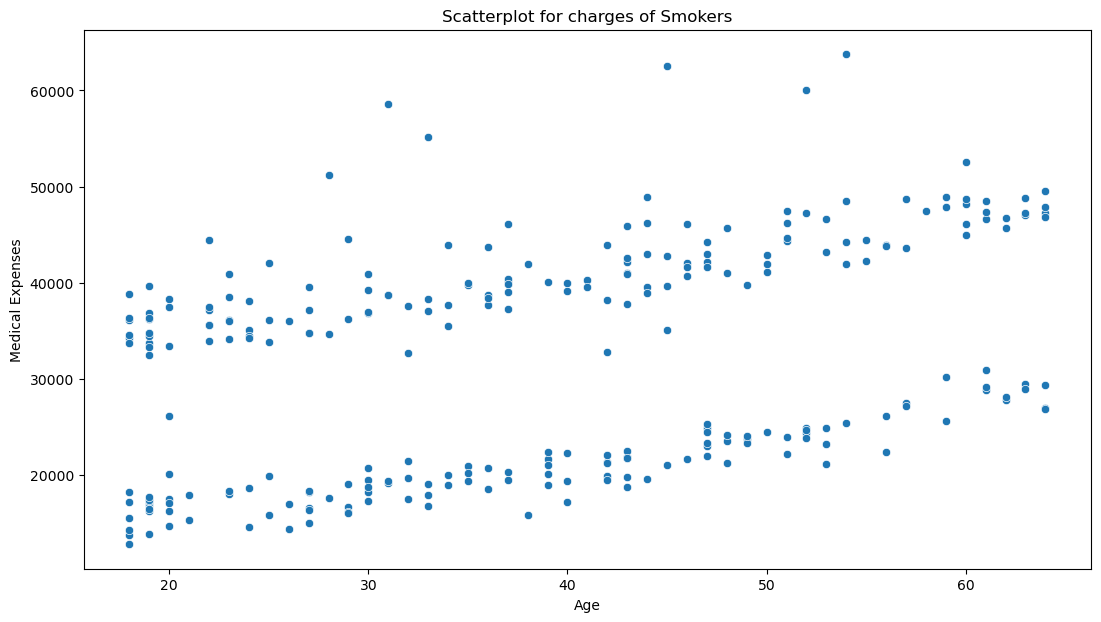

In [20]:
plt.figure(figsize=(13, 7))

sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 1)])
plt.title("Scatterplot for charges of Smokers")
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

*In this graph there are two segments, one with high medical expense which may due to the smoking related illness and other with low medical expense which may due to age related illness.*

Now, in order to get more clear we can combine both the graphs.

<Figure size 1500x500 with 0 Axes>

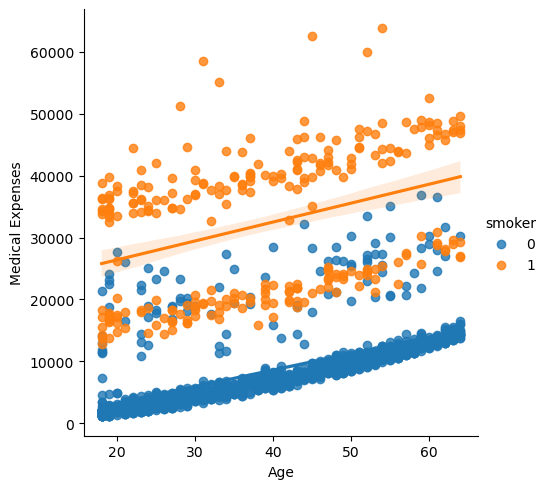

In [21]:
# Age Charges Distribution

plt.figure(figsize=(15, 5))
sns.lmplot(x = 'age', y = 'charges', data = data, hue = 'smoker')
plt.xlabel("Age")
plt.ylabel("Medical Expenses")
plt.show()

*Now, we can clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers irrespective of age. In non-smokers, the cost of treatment increases with age which is obvious.*

In [22]:
import warnings
warnings.filterwarnings('ignore')

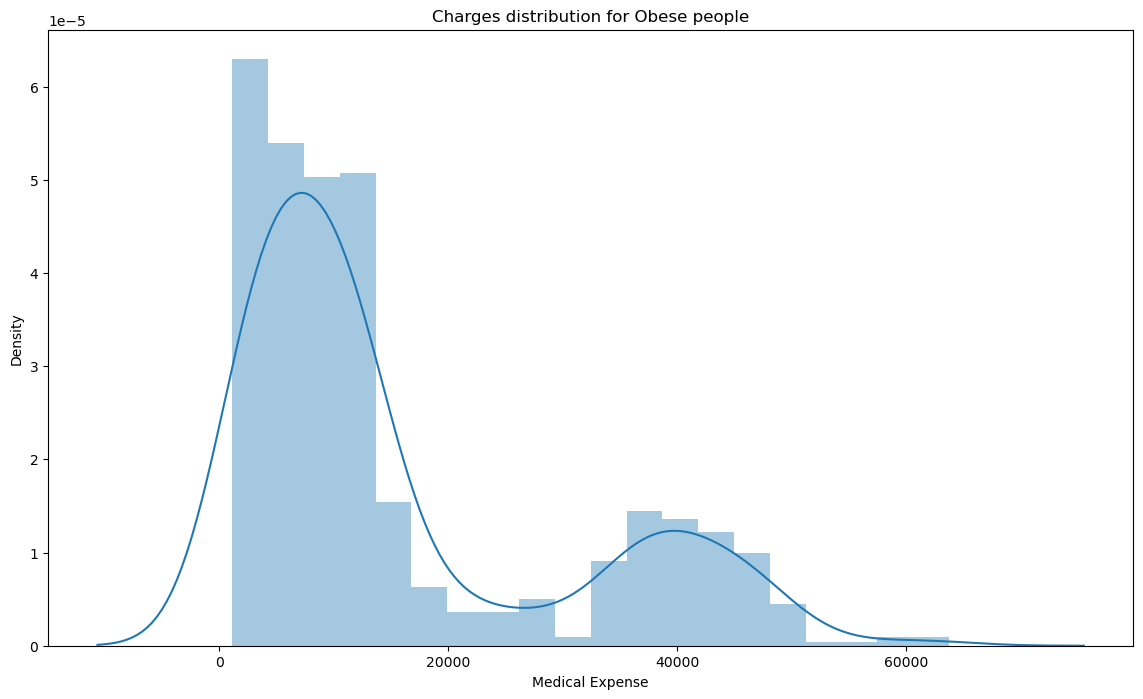

In [23]:
## Relation between BMI and Medical expenses

plt.figure(figsize=(14, 8))
sns.distplot(data[(data.bmi > 30)]['charges'])
plt.title("Charges distribution for Obese people")
plt.xlabel("Medical Expense")
plt.show()

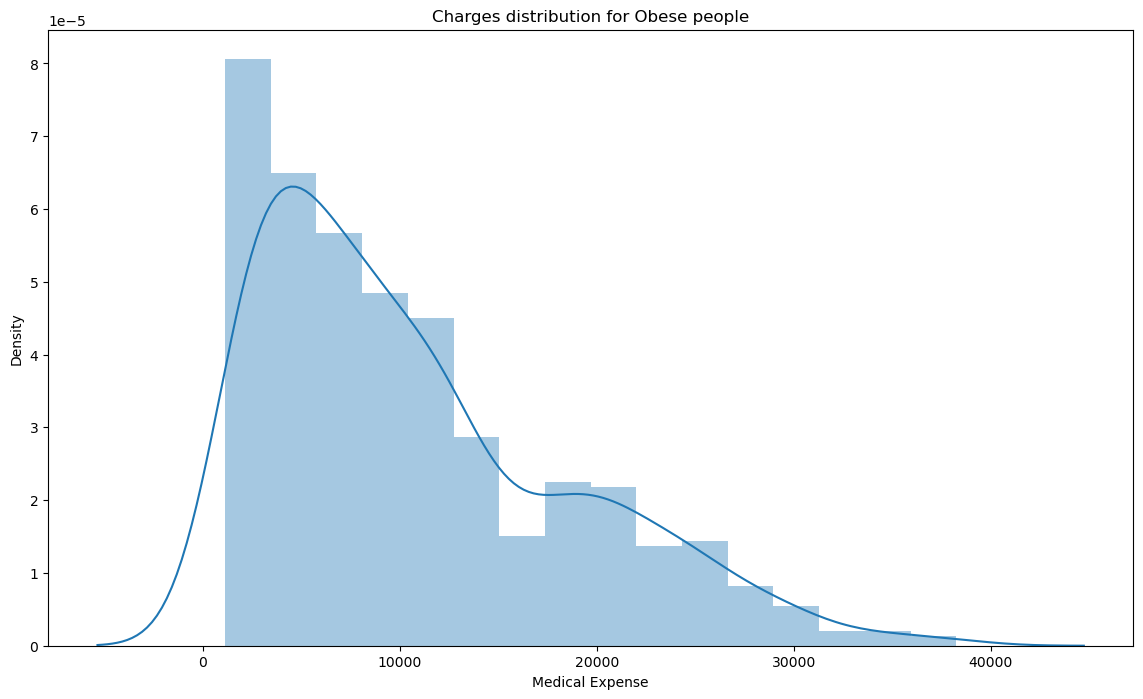

In [24]:
plt.figure(figsize=(14, 8))
sns.distplot(data[(data.bmi < 30)]['charges'])
plt.title("Charges distribution for Obese people")
plt.xlabel("Medical Expense")
plt.show()

*Therefore, people with BMI less than 30 are spending less where as people with BMI more than 30 are spending more.*

### Feature Selection

In [25]:
## Dropping irrelevant column
data.drop('region', axis = 1, inplace = True)

In [26]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## Model Building & Evaluation

### Linear Regression

In [27]:
X = data.drop('charges', axis = 1)
y = data.charges

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Making Prediction
y_pred = reg.predict(X_test)

In [32]:
# Model Evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

MAE: 4180.786422973238
RMSE: 6159.554567242219
R2 Score:  0.7486163979240839


## Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [34]:
# Transforming the feature to higher degree
X_train_poly = poly_reg.fit_transform(X_train)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size = 0.2, random_state = 42)

In [35]:
# Train the Model
plr = LinearRegression()
plr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Making Prediction
y_pred_plr = plr.predict(X_test)

In [37]:
# Model Evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_plr))

MAE: 2968.067586616951
RMSE: 4852.834838876814
R2 Score:  0.7998931111191252


***Result: My Model is able to explain 80 % of the total data set.***

### Making a Prediction System

In [38]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [39]:
#input the values
age = 21
sex = 1
bmi = 46
children = 0
smoker = 0

In [40]:
#predicting the price using random forest regression
charge = reg.predict([[age, sex, bmi, children, smoker]])
print('The charge of this new patient is $',charge[0])

The charge of this new patient is $ 8081.964626104533


### Conclusion

**We have created End to End Prediction system using Linear Regression Model and our accuracy score comes out to be a 75%. Later, we can use more advanced libraries to make this system more versatile and robust, so that we can deploy it in the market.**

**Moreover, based on our analysis we can observe that medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.**

***Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits***